In [1]:
import os
import yaml


from roadvision3d.src.engine.dataloader import build_dataloader
from roadvision3d.src.engine.model_builder import build_model
from roadvision3d.src.engine.tester import Tester
from roadvision3d.src.datasets.kitti import KITTI
from inference import prepare_data
from roadvision3d.src.engine.decode_helper import extract_dets_from_outputs
from roadvision3d.src.engine.decode_helper import decode_detections
from roadvision3d.src.engine.model_saver import load_checkpoint
from roadvision3d.src.engine.logger import Logger
from roadvision3d.src.datasets.object_3d import Object3d

from inference import inference_on_dataset
from visualizer import draw_2d_bboxes, draw_3d_bboxes


import torch
import numpy as np

%load_ext autoreload
%autoreload 2

In [2]:
config_path = '/home/javier/pytorch/RoadVision3D/roadvision3d/configs/dair_kitti.yaml'
cfg = yaml.load(open(config_path, 'r'), Loader=yaml.Loader)    
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

data_id = 56
split = 'test'


In [3]:
results = inference_on_dataset(data_id, split, cfg, device)
print(results)

FileNotFoundError: 

In [5]:
data = KITTI(split=split, cfg=cfg['dataset'])
img = data.get_image(data_id)
calib = data.get_calib(data_id)

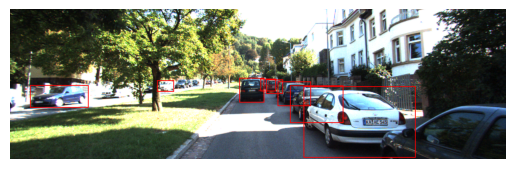

In [6]:
img_2d = img.copy()
draw_2d_bboxes(img_2d, results)

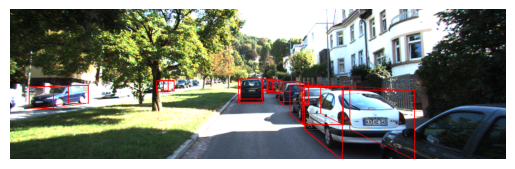

In [7]:
img_3d = img.copy()
draw_3d_bboxes(img_3d, results, calib)